In [75]:
import math
import numpy as np

def addRow(matrx, row, toAdd, multiplier):
    temp = matrx.copy()
    for i in range(len(matrx[row, :])):
        temp[row, i] = temp[row, i] + multiplier*temp[toAdd, i]
    return np.array(temp)

def toLeading1(matrx, row, col):
    temp = matrx.copy()
    temp = np.array(temp, float)
    if (temp[row, col] != 0):
        temp[row, :] = temp[row, :]/temp[row, col]
    return np.array(temp)

def gauss_Jordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = toLeading1(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRow(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRow(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

def function(x):
    return np.log(x+1)



# Direct method

Usually when dealing with direct method of interpolation, we prefer to choose 3 data points to make it a system of 3 equations since it is easier to calculate them by hand than with systems of higher number of equation. With Gauss Jordan method available, it is no longer an issue.

First, we have a set of data points. Based on the number of data points, we will build the matrix accordingly.

In [84]:
dataPoints =np.array([[2,function(2)],[1,function(1)],[3,function(3)],[8,function(8)], [5, function(5)]])

def createMatrix(points):
    matrix = []
    polyTerm = len(points)
    #We start building the matrix row by row as the number of row is the number of data points
    for i in range(polyTerm):
        row = []
        #Now we add element to each row, which is number of data points plus 1 in total
        for j in range(polyTerm + 1):
            row.append(points[i,0]**j)
        row.append(points[i, 1])
        matrix.append(row)
    return matrix
        
C = createMatrix(dataPoints)
C

[[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 1.0986122886681098],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6931471805599453],
 [1.0, 3.0, 9.0, 27.0, 81.0, 243.0, 1.3862943611198906],
 [1.0, 8.0, 64.0, 512.0, 4096.0, 32768.0, 2.1972245773362196],
 [1.0, 5.0, 25.0, 125.0, 625.0, 3125.0, 1.791759469228055]]

Now we apply the Gauss Jordan for the built matrix. The we surf through the last column of the matrix starting from the last element (one with lowest term).

This is the formal form of the polynomial, which is not a part of the assignment. But prof asked if I can do it better, which I think I can (slightly), so I did.

In [91]:

gauss_Jordan(createMatrix(dataPoints))[:,-1]

string = ''
for i in range(len(gauss_Jordan(createMatrix(dataPoints))[:,-1])):
    #Since string will show whatever sign coef has, we change it only show sign when it negative,
    #and not show positive sign for the first term
    if (i != 0):
        coef = gaussJordan(createMatrix(dataPoints))[i,-1]
        sign = '+' if coef>0 else ''
        string = string + sign + '{:.2f}'.format(coef) +r'x^{:.2f}'.format(i)
    else:
        coef = gaussJordan(createMatrix(dataPoints))[i,-1]
        string = string + sign + '{:.2f}'.format(coef)
    
string

'0.10+0.71x^1.00-0.14x^2.00+0.02x^3.00-0.00x^4.00'

In [92]:
#Create formal form of the polynomial for graphing purpose
def createPoly(matrix, x):
    poly = 0
    for i in range(len(gauss_Jordan(createMatrix(dataPoints))[:,-1])):
        coef = gaussJordan(createMatrix(dataPoints))[i,-1]
        poly = poly + coef*x**i
    return poly

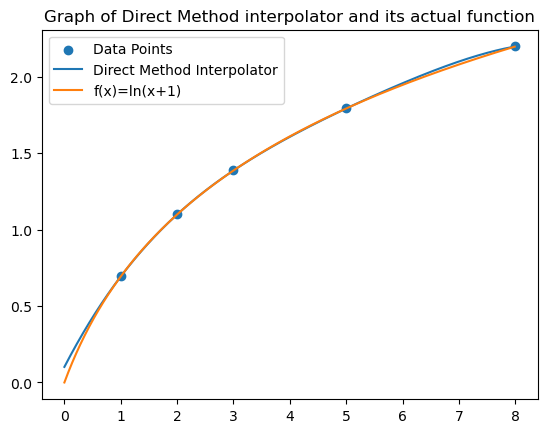

In [97]:
import matplotlib.pyplot as pl

x = numpie.arange(0, 8, 0.01)
pl.scatter(*zip(*dataPoints))
pl.plot(x, createPoly(dataPoints,x))
pl.plot(x, function(x))
pl.title("Graph of Direct Method interpolator and its actual function")
pl.legend(['Data Points','Direct Method Interpolator','f(x)=ln(x+1)'])

pl.show()